## Module assignment 7 
- INFO 3401 Fall 2020
- Topic: APIs and JSON
- 200 points

### Intro

For this assignment we will be using the Spotify API using the Spotipy API wrapper. Both the API and the wrapper illustrate a number of common patterns in working with APIs including: 

1. **Authentication.** _Getting set up with a service, and proving you are who you say you are_

2. **Pagination.** _Accessing data in chunks or pages_

3. **Python wrapper libraries.** _Using wrapper code around an API to help you use the API with Python objects_

4. **Nesting and linking.** _Calls to the API return nested and linked JSON objects_

It's very useful to be comfortable working with APIs in general. This module will give you practice with one specific API to help build up your capacity to work with other tools.

### Setup [25 points]

#### Step One: Registration
To do this assignment, you will need to get set up with the Spotify API. Please follow the sections "Set Up Your Account" and "Register Your Application" to tell Spotify that you are a creating an application. Here is a [link](https://developer.spotify.com/documentation/web-api/quick-start/) to the Spotify site to get started. **You should NOT setup a nodejs environment. Just follow the steps to create an account and register a sample application**. 

#### Step Two: Lookup
Once you are set up, you should be able to go to your Spotify ["Dashboard"](https://developer.spotify.com/dashboard/applications), click on your application and learn your `Client ID` and `Client Secret`. 

#### Step Three: Configuration
You should set up [environment variables](https://askubuntu.com/questions/58814/how-do-i-add-environment-variables) `CLIENT_ID` and `CLIENT_SECRET`. We covered how to do this in class on 11/16 so please consult the recording for extra help. 

#### Step Four: Installation
You should install spotipy in the same environment where you set your `CLIENT_ID` and `CLIENT_SECRET` variables using the command `$pip install spotipy --upgrade`

#### Step Four: Five
If you are correctly set up, you should be able to run the cell below without error to print out the albumbs from the English singer [Birdy](https://www.officialbirdy.com/). This is the example on the "Welcome to Spotipy" [documentation page](https://spotipy.readthedocs.io/en/2.16.1/). Often APIs give you a minimal example to help you get started.

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_albums(birdy_uri, album_type='album')

albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


In [5]:
love_songs = []

for offset in range(1000):
    if offset % 100:
        print("iter=", offset)
    results = spotify.search(q='love', type='track', limit=50, offset=offset)
    items = results["tracks"]["items"]
    for item in items:
        for artist in item['artists']:
            love_songs.append({"artist": artist["name"], "artist_id": artist['id'], "song": item["name"]})

<ipython-input-5-eb6122f8817d>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for offset in tqdm(range(1000)):


In [6]:
import pandas as pd
love_songs = pd.DataFrame(love_songs)

In [7]:
money_songs = []

for offset in range(1000):
    if offset % 100:
        print("iter=", offset)
    results = spotify.search(q='money', type='track', limit=50, offset=offset)
    items = results["tracks"]["items"]
    for item in items:
        for artist in item['artists']:
            money_songs.append({"artist": artist["name"], "artist_id": artist['id'], "song": item["name"]})

<ipython-input-7-16dbda4add3b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for offset in tqdm(range(1000)):


In [10]:
money_songs = pd.DataFrame(money_songs)

In [47]:
artists = love_songs.merge(money_songs, on="artist", how="inner", suffixes=('_love', '_money'))[["artist", "artist_id_money"]]

artists = artists.drop_duplicates().reset_index()

artists = artists.rename(columns={"artist_id_money": "artist_id"})

artists

,index,artist,artist_id
0,0,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg
1,5555,Rihanna,5pKCCKE2ajJHZ9KAiaK11H
2,29491,Lil Tecca,4Ga1P7PMIsmqEZqhYZQgDo
3,127932,Trippie Redd,6Xgp2XMz1fhVYe7i6yNAax
4,672273,Lil Wayne,55Aa2cqylxrFIXC767Z865
...,...,...,...
97,3300618,Rich The Kid,1pPmIToKXyGdsCF6LmqLmI
98,3306718,Anderson .Paak,3jK9MiCrA42lLAdMGUZpwa
99,3314218,The Drums,0p5axeJsbtTCXBrRVoKjwu
100,3314538,Mötley Crüe,0cc6vw3VN8YlIcvr1v7tBL


In [13]:
def get_all_albums(artist_id):
    '''Ok to get the first 10'''
    results = spotify.artist_albums(artist_id, album_type='album', limit=50)
    out = []
    for i in results['items']:
        out.append(i["id"])
    return out

In [14]:
def get_tracks_from_album(album_id):
    tracks = []
    for track in spotify.album_tracks(album_id)['items']:
        tracks.append(track["name"])
    return tracks

def get_tracks_from_all_albums(artist_id):
    albums = get_all_albums(artist_id=artist_id)
    all_tracks = []
        
    for album_id in albums:
        tracks = get_tracks_from_album(album_id)
        all_tracks = all_tracks + tracks

    return all_tracks

In [127]:
all_tracks = []

for artist_no, artist_id in enumerate(artists["artist_id"]):
    if (artist_no % 10) == 0:
        print(artist_no)
    tracks = get_tracks_from_all_albums(artist_id)
    for track in tracks:
        all_tracks.append({"artist_id": artist_id, "track": track})
        


2YZyLoL8N0Wb9xBt1NhZWg
45TgXXqMDdF8BkjA83OM7z
3nFkdlSjzX9mRTtwJOzDYB
3KV3p5EY4AvKxOlhGHORLg
3q7HBObVc0L8jNeTe5Gofh
13ubrt8QOOCPljQ2FL1Kca
2jku7tDXc6XoB6MO2hFuqg
0c173mlxpT3dSFRgMO8XPh
4tYSBptyGeVyZsk8JC4JHZ
5a2EaR3hamoenG9rDuVn8j
0cc6vw3VN8YlIcvr1v7tBL


In [159]:
all_tracks_df = pd.DataFrame(all_tracks)
all_tracks_df.drop_duplicates(inplace=True, ignore_index=True)
all_tracks_df = all_tracks_df.groupby("artist_id").count().reset_index()
all_tracks_df = all_tracks_df.rename(columns={"track": "count"})
all_tracks_df = all_tracks_df.merge(artists, on="artist_id")

all_tracks_df = all_tracks_df.reindex()

all_tracks_df

,artist_id,count,index,artist
0,00FQb4jTyendYWaN8pK0wa,106,2577458,Lana Del Rey
1,02kJSzxNuaWGqwubyUba0Z,100,2558508,G-Eazy
2,0A0FS04o6zMoto8OKPsDwY,164,2916768,YG
3,0ErzCpIMyLcjPiwT4elrtZ,63,2607258,NLE Choppa
4,0HkcYmcjrBR3SCw9Ld5VZk,44,3182618,Calboy
...,...,...,...,...
94,7J2lZBANizgPNfUzux31PV,200,3240118,David Gray
95,7bXgB6jMjp9ATFy66eO08Z,276,2874018,Chris Brown
96,7c0XG5cIJTrrAgEC3ULPiq,110,3225118,Ty Dolla $ign
97,7mnBLXK823vNxN3UWB7Gfz,139,3295618,The Black Keys


In [69]:
len(all_tracks[all_tracks["artist_id"] == "55Aa2cqylxrFIXC767Z865"]["track"].unique())

325

In [70]:
love_tracks = all_tracks[all_tracks["track"].str.lower().str.contains("love")]

love_tracks = love_tracks.drop_duplicates().reset_index()

In [71]:
money_tracks = all_tracks[all_tracks["track"].str.lower().str.contains("money")]

money_tracks = money_tracks.drop_duplicates().reset_index()

In [72]:
artist_money = pd.DataFrame(money_tracks.value_counts(subset=['artist_id'], sort=True)).reset_index()

artist_money = artist_money.rename(columns={0: "Nmoney"})

artist_money

,artist_id,Nmoney
0,6Ha4aES39QiVjR0L2lwuwq,13
1,1RyvyyTE3xzB2ZywiAwp0i,8
2,0z4gvV4rjIZ9wHck67ucSV,8
3,3WrFJ7ztbogyGnTHbHJFl2,6
4,55Aa2cqylxrFIXC767Z865,6
...,...,...
65,2EMAnMvWE2eb56ToJVfCWs,1
66,28ExwzUQsvgJooOI0X1mr3,1
67,20JZFwl6HVl6yg8a4H3ZqK,1
68,1pPmIToKXyGdsCF6LmqLmI,1


In [20]:
artist_love = pd.DataFrame(love_tracks.value_counts(subset=['artist_id'], sort=True)).reset_index()

artist_love = artist_love.rename(columns={0: "Nlove"})

artist_love

,artist_id,Nlove
0,38h03gA85YYPeDPd9ER9rT,54
1,5a2EaR3hamoenG9rDuVn8j,44
2,1Cs0zKBU1kc0i8ypK3B9ai,33
3,3WrFJ7ztbogyGnTHbHJFl2,28
4,4mxWe1mtYIYfP040G38yvS,26
...,...,...
80,20JZFwl6HVl6yg8a4H3ZqK,1
81,6DPYiyq5kWVQS4RGwxzPC7,1
82,699OTQXzgjhIYAHMy9RyPD,1
83,4MCBfE4596Uoi2O4DtmEMz,1


In [166]:
merged = artist_love.merge(artist_money, how='outer').fillna(0)

merged = merged.merge(artists, on="artist_id", how="inner")[["Nlove", "Nmoney", "artist"]]

normalized = merged.merge(all_tracks_df, on="artist", how="inner")

normalized["love_pct"] = normalized["Nlove"]/normalized["count"]
normalized["money_pct"] = normalized["Nmoney"]/normalized["count"]

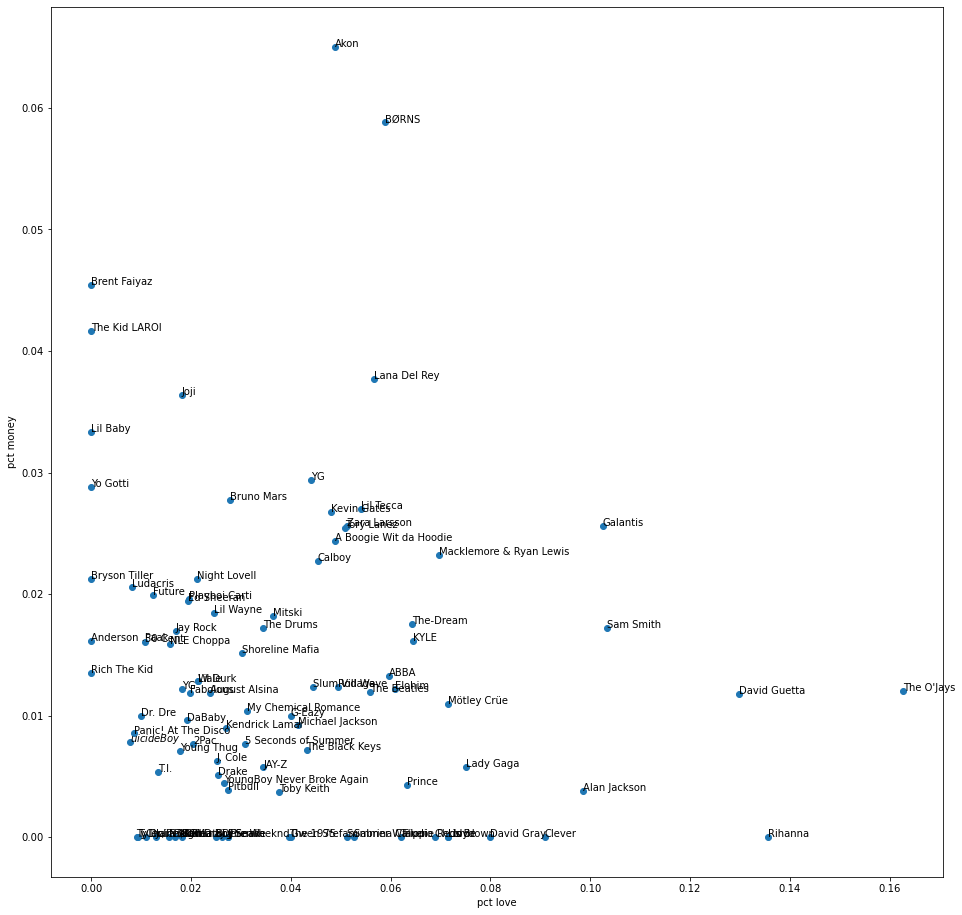

In [171]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(normalized["love_pct"].to_list(), normalized["money_pct"].to_list())

for i, txt in enumerate(normalized["artist"]):
    ax.annotate(txt, (normalized["love_pct"][i], normalized["money_pct"][i]))
    
ax.set_xlabel('pct love')
ax.set_ylabel('pct money')
fig.set_size_inches(16, 16)

#### Extra credit 

It is hard to see all of the points in the plot above. Try a few solutions to make the plot look nicer. Any of the following strategies might work